# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 2: Introduction to Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$



In [1]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

We can start be choosing coefficients for a second degree polynomial equation $(a x^2 + bx + c)$ that will distribute the data we will try to model.

Let's define some random x data (inputs) we hope to predict y (outputs) of.

In [2]:
def eval_2nd_degree(coeffs, x):
    """
    Function to return the output of evaluating a second degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 0, 0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

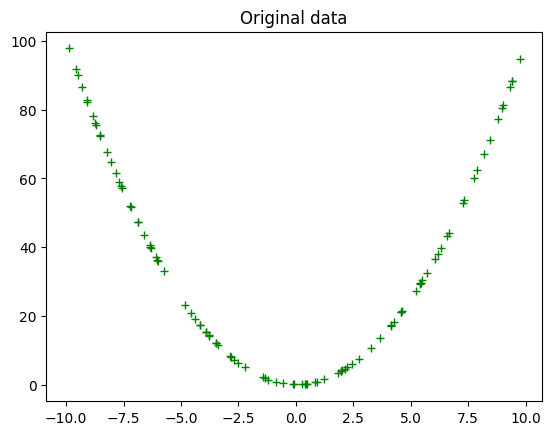

In [3]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

This is good, but we could improve on this by making things more realistic. You can add noise or **jitter** to the values so they can resemble real-world data.


In [4]:
def eval_2nd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max

    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it
                                                  # give a number greater than the interval min.

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)


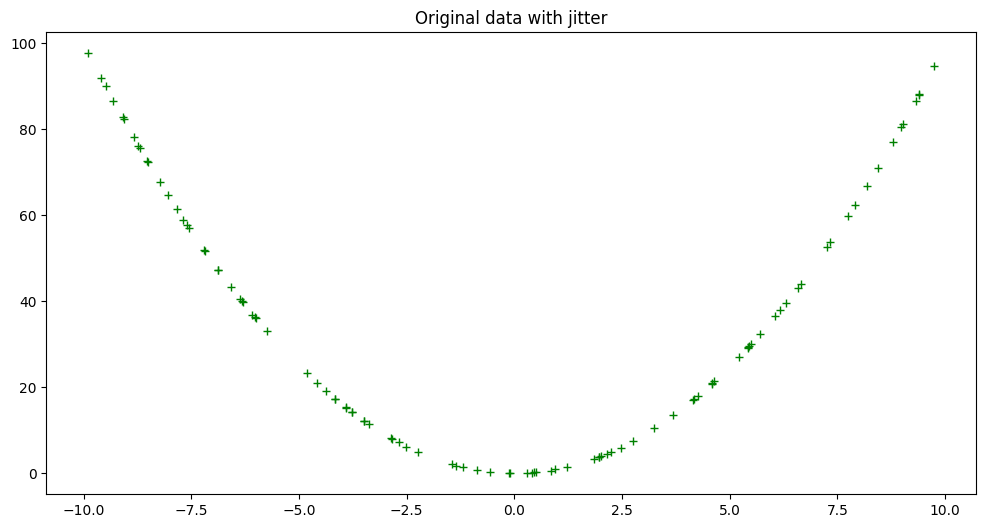

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

We will now build our predictive model, and optimize it with gradient descent and we will try to get as close to these values as possible.

To get a quantifiable measure of how incorrect it is, we calculate the Mean Squared Error loss for the model. This is the mean value of the sum of the squared differences between the actual and predicted outputs.

$$ E = \frac{1}{n} \sum_{i=0}^n (y_i - \bar{y_i})^2 $$

In [6]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

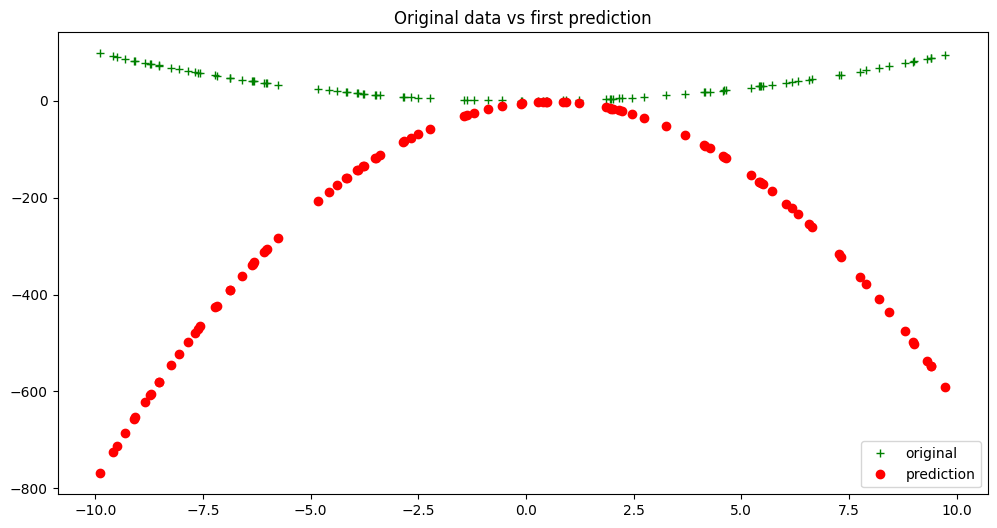

In [7]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [8]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

146807.86204726336

We can see that the loss is quite a large number. Let’s now see if we can improve on this fairly high loss metric by optimizing the model with gradient descent.

We wish to improve our model. Therefore we want to alter its coefficients $a$, $b$ and $c$ to decrease the error. Therefore we require knowledge about how each coefficient affects the error. This is achieved by calculating the partial derivative of the loss function with respect to **each** of the individual coefficients.

In [9]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """

    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    return (gradient_a, gradient_b, gradient_c)   # return calculated gradients as a a tuple of its 3 parts

In [10]:
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (-3.4872074852403587, 7.879149056895183, -4.941405407033594)
Now have smaller model loss: 49608.172144854274 vs 146807.86204726336


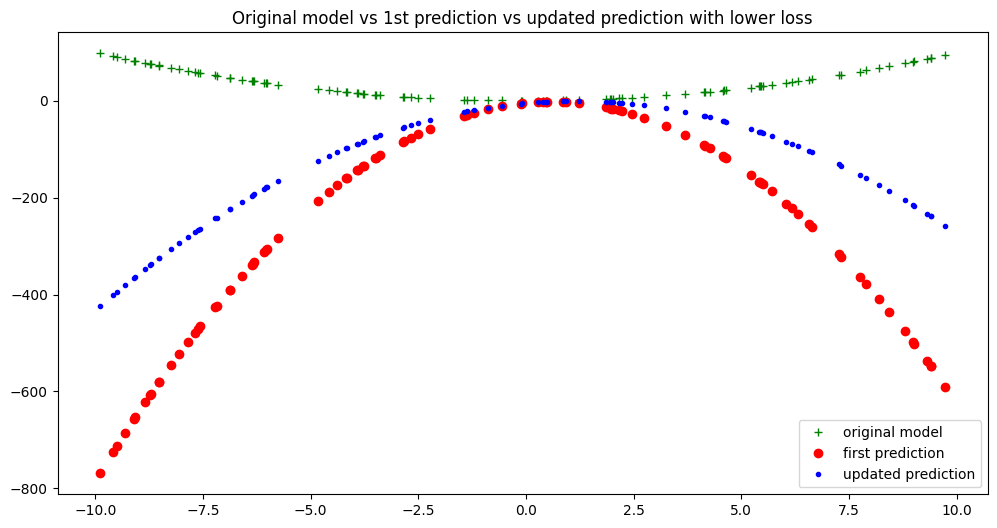

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

We’re almost ready. The last step will be to perform gradient descent iteratively over a number of epochs (cycles or iterations.) With every epoch we hope to see an improvement in the form of lowered loss, and better model-fitting to the original data.

In [12]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    # update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [13]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

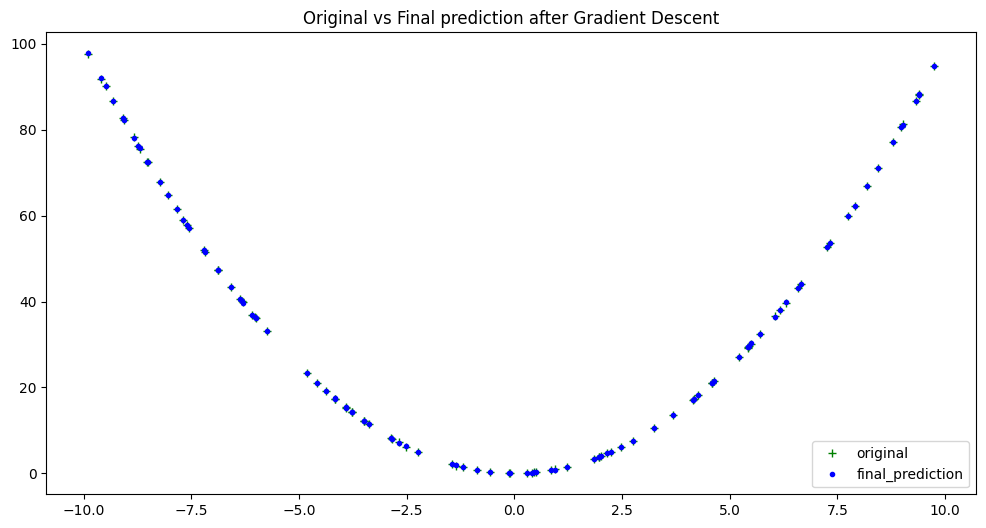

In [15]:
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

In [14]:
GD = gradient_descent(30000, 0.0003)


[13475.624637116503, 2869.715432846906, 1958.273415665309, 1815.4133533665963, 1736.1622571518062, 1664.7307185029726, 1596.5981613153112, 1531.2972754982177, 1468.6853640008349, 1408.6497165327594, 1351.0841647769712, 1295.8870592843532, 1242.960945034913, 1192.2123779132319, 1143.5517588087196, 1096.8931753375862, 1052.154250140267, 1009.2559954258945, 968.1226735021916, 928.6816630441622, 890.8633308653946, 854.6009089655777, 819.8303766371265, 786.4903474227408, 754.5219607243141, 723.8687778717832, 694.476682468427, 666.2937848366366, 639.2703303954412, 613.3586118080115, 588.5128847440168, 564.6892871080927, 541.8457615918065, 519.9419814123638, 498.9392791069297, 478.8005782568453, 459.49032802117404, 440.9744403639862, 423.2202298645435, 406.1963560041051, 389.8727678274495, 374.22065088139925, 359.2123763366603, 344.8214522031347, 331.0224765525732, 317.7910926659628, 305.1039460264636, 292.9386430819466, 281.27371170432554, 270.0885632758611, 259.3634563354952, 249.0794617210

This trained model is showing vast improvements after it’s full training cycle. We can examine further by inspecting its final predicted coefficients $a$, $b$ and $c$.

In [16]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (0.9999579417260247, -0.002867610798230069, -0.012778521556486263)
Original Coefficients: [1, 0, 0]


Not too far off! A big improvement over the initial random model. Looking at the plot of the loss reduction over training offers further insights.


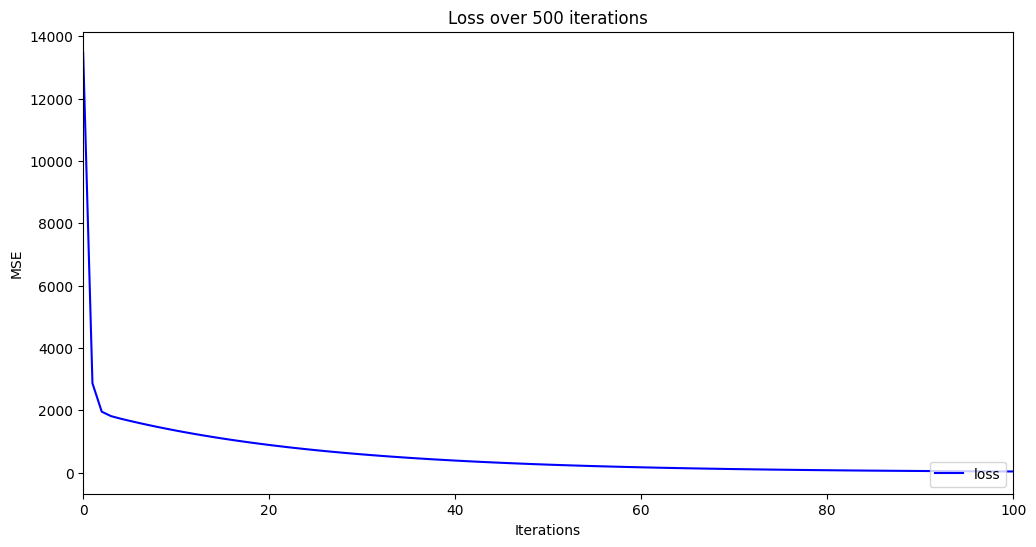

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlim((0,100))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

We observe that the model loss reached close to zero, to give us our more accurate coefficients. We can also see there was no major improvement in loss after about 100 epochs. An alternative strategy would be to add some kind of condition to the training step that stops training when a certain minimum loss threshold has been reached. This would prevent excessive training and potential over-fitting for the model.

# Things to try



1.   Change the coefficients array and try a different polynomial instead of our $x^2$.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
3. Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of $x^2$?
4. Can you modify the algorithm to find a maxima of a function, instead of a minima?



***1st ANSWER***


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-18-813a88b4b501>:23: RuntimeWarning: invalid value encountered in subtract
  coeffs = coeffs - learning_rate * np.array(grad)


Final Coefficients: [nan nan nan]


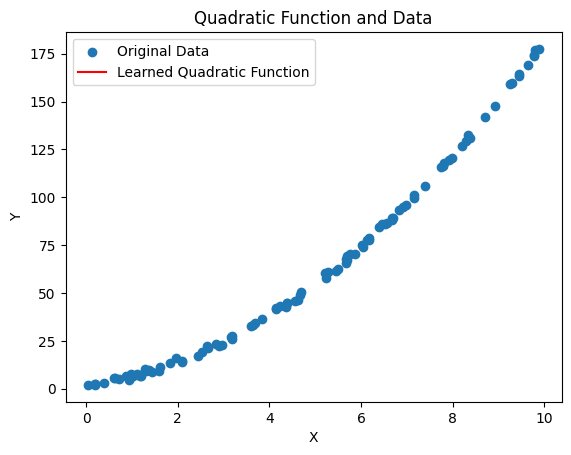

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the quadratic polynomial
def quadratic_function(x, coeffs):
    return coeffs[0] + coeffs[1]*x + coeffs[2]*x**2

# Function to calculate the gradient of the cost function
def gradient(x, y, coeffs):
    m = len(x)
    predictions = quadratic_function(x, coeffs)
    error = predictions - y
    gradient = [np.sum(error), np.sum(error * x), np.sum(error * x**2)]
    return gradient

# Gradient Descent function
def gradient_descent(x, y, learning_rate, num_iterations):
    # Initial coefficients
    coeffs = np.zeros(3)

    for _ in range(num_iterations):
        grad = gradient(x, y, coeffs)
        coeffs = coeffs - learning_rate * np.array(grad)

    return coeffs

# Generate some random data for demonstration
np.random.seed(0)
x = np.random.rand(100, 1) * 10
y = 2 + 3*x + 1.5*x**2 + np.random.randn(100, 1)

# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Perform gradient descent
final_coeffs = gradient_descent(x, y, learning_rate, num_iterations)

# Print the final coefficients
print("Final Coefficients:", final_coeffs)

# Plot the original data and the learned quadratic function
plt.scatter(x, y, label='Original Data')
x_range = np.linspace(min(x), max(x), 100)
plt.plot(x_range, quadratic_function(x_range, final_coeffs), color='red', label='Learned Quadratic Function')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Quadratic Function and Data')
plt.show()


***2nd ANSWER***


Adjusting the learning rate in gradient descent can significantly impact convergence. A learning rate that is too small may cause slow convergence, while a learning rate that is too large may cause divergence or overshooting the minimum.

Let's modify the previous example to observe the effects of different learning rates:

<ipython-input-19-cf69e12b1eb1>:13: RuntimeWarning: overflow encountered in multiply
  gradient = [np.sum(error), np.sum(error * x), np.sum(error * x**2)]
<ipython-input-19-cf69e12b1eb1>:23: RuntimeWarning: invalid value encountered in subtract
  coeffs = coeffs - learning_rate * np.array(grad)


Learning Rate: 0.001, Final Coefficients: [nan nan nan]


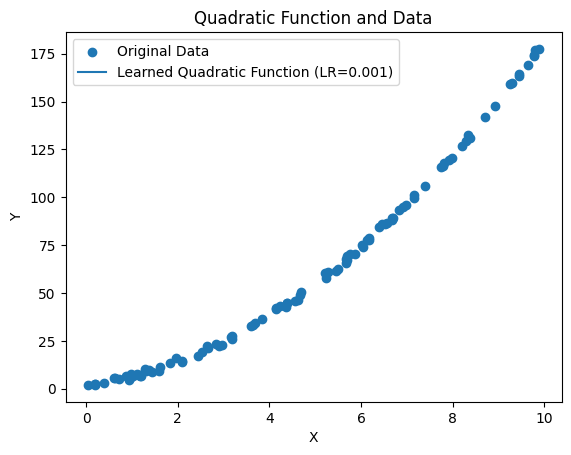

Learning Rate: 0.01, Final Coefficients: [nan nan nan]


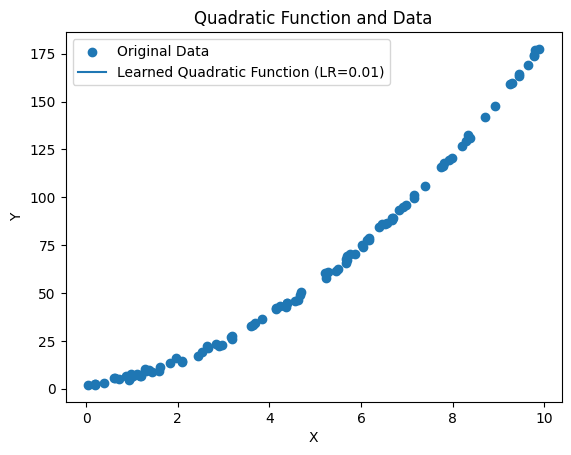

<ipython-input-19-cf69e12b1eb1>:6: RuntimeWarning: overflow encountered in multiply
  return coeffs[0] + coeffs[1]*x + coeffs[2]*x**2
<ipython-input-19-cf69e12b1eb1>:6: RuntimeWarning: overflow encountered in add
  return coeffs[0] + coeffs[1]*x + coeffs[2]*x**2


Learning Rate: 0.1, Final Coefficients: [nan nan nan]


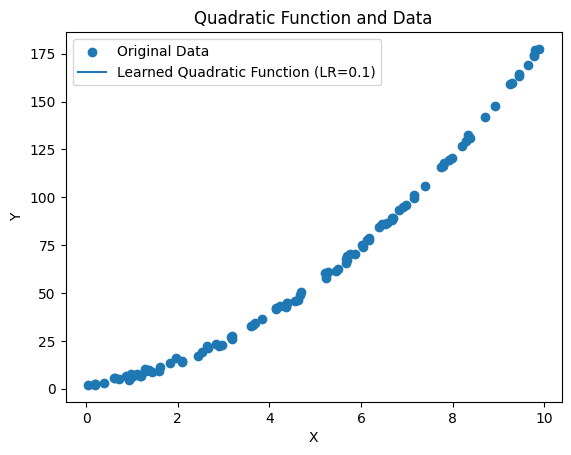

Learning Rate: 1, Final Coefficients: [nan nan nan]


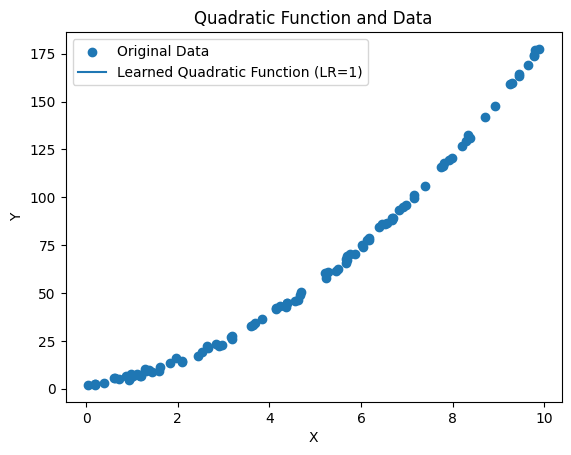

Learning Rate: 10, Final Coefficients: [nan nan nan]


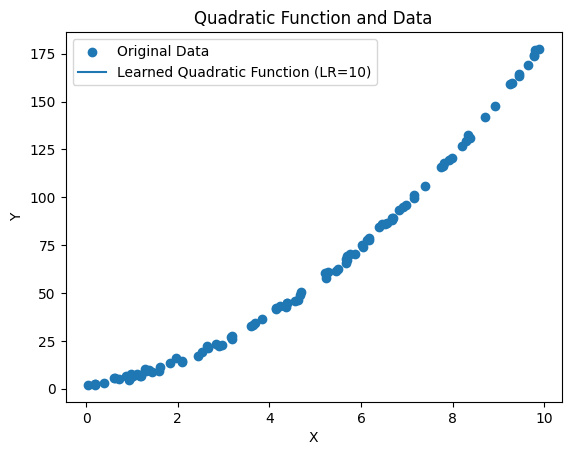

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the quadratic polynomial
def quadratic_function(x, coeffs):
    return coeffs[0] + coeffs[1]*x + coeffs[2]*x**2

# Function to calculate the gradient of the cost function
def gradient(x, y, coeffs):
    m = len(x)
    predictions = quadratic_function(x, coeffs)
    error = predictions - y
    gradient = [np.sum(error), np.sum(error * x), np.sum(error * x**2)]
    return gradient

# Gradient Descent function
def gradient_descent(x, y, learning_rate, num_iterations):
    # Initial coefficients
    coeffs = np.zeros(3)

    for _ in range(num_iterations):
        grad = gradient(x, y, coeffs)
        coeffs = coeffs - learning_rate * np.array(grad)

    return coeffs

# Generate some random data for demonstration
np.random.seed(0)
x = np.random.rand(100, 1) * 10
y = 2 + 3*x + 1.5*x**2 + np.random.randn(100, 1)

# Set hyperparameters
num_iterations = 1000

# Experiment with different learning rates
learning_rates = [0.001, 0.01, 0.1, 1, 10]

for lr in learning_rates:
    final_coeffs = gradient_descent(x, y, lr, num_iterations)
    print(f"Learning Rate: {lr}, Final Coefficients: {final_coeffs}")

    # Plot the original data and the learned quadratic function
    plt.scatter(x, y, label='Original Data')
    x_range = np.linspace(min(x), max(x), 100)
    plt.plot(x_range, quadratic_function(x_range, final_coeffs), label=f'Learned Quadratic Function (LR={lr})')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Quadratic Function and Data')
    plt.show()

-->This code snippet runs the gradient descent algorithm for different learning rates and prints the final coefficients for each case. It also plots the original data along with the learned quadratic function for visualization.

-->Experiment with various learning rates, including very large ones, and observe how the convergence behavior changes. Extremely large learning rates might lead to divergence instead of convergence. It's important to strike a balance and choose a learning rate that allows the algorithm to converge efficiently without overshooting the minimum.

***3rd ANSWER***

The choice of initialization in iterative optimization algorithms, like gradient descent, can indeed impact the convergence and the final values reached by the algorithm. For a quadratic function like � 2 x 2 , the optimization landscape is relatively simple, and convergence is generally straightforward, regardless of the initialization. However, for higher-degree polynomials, especially those with multiple roots, the optimization landscape becomes more complex, and the choice of initialization can influence convergence.

Let's modify the previous example to use a degree-5 polynomial with known roots and observe the impact of different initializations:

python Copy

Initialization: [0. 0. 0. 0. 0. 0.], Final Coefficients: [ 1.0527167  -0.07733026 -5.2540875   0.49107228  3.41898796 -0.95548715]


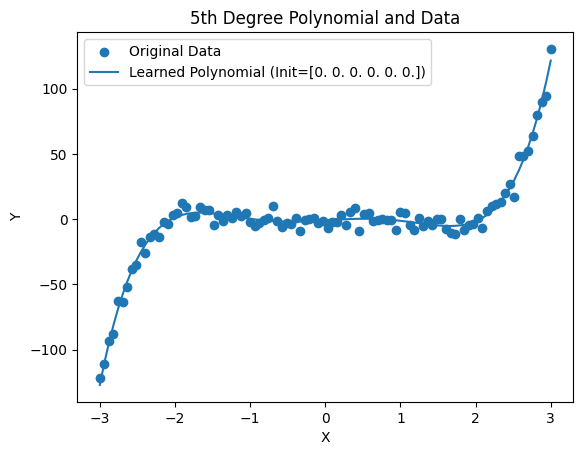

Initialization: [1. 1. 1. 1. 1. 1.], Final Coefficients: [ 1.05275987 -0.07728709 -5.25404432  0.49111545  3.41903113 -0.95544398]


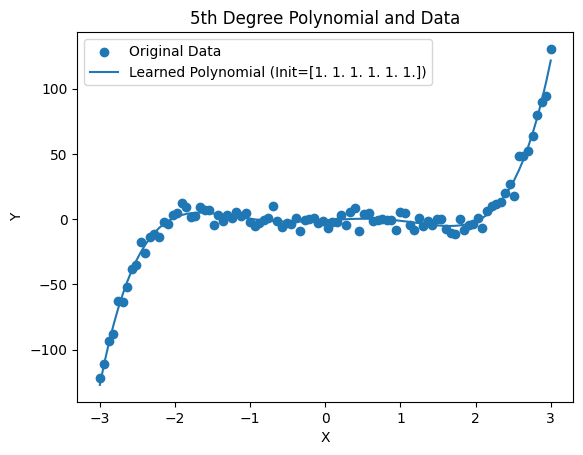

Initialization: [-1  0  1  2 -2  0], Final Coefficients: [ 1.05267353 -0.07733026 -5.25404432  0.49115862  3.41890162 -0.95548715]


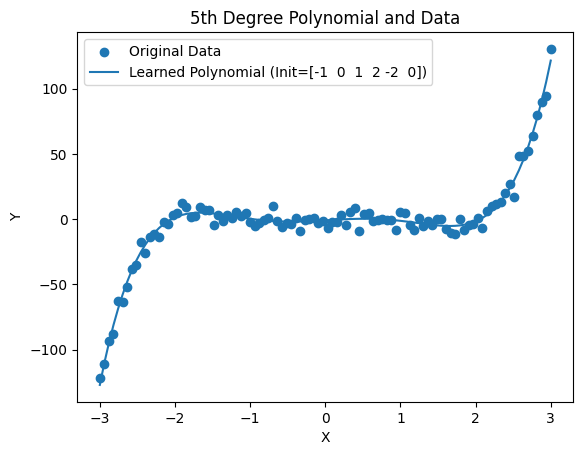

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the 5th degree polynomial
def fifth_degree_polynomial(x, coeffs):
    return np.polyval(coeffs, x)

# Function to calculate the gradient of the cost function
def gradient(x, y, coeffs):
    m = len(x)
    predictions = fifth_degree_polynomial(x, coeffs)
    error = predictions - y
    gradient = np.polyfit(x, error, len(coeffs)-1)
    return gradient

# Gradient Descent function
def gradient_descent(x, y, learning_rate, num_iterations, initial_coeffs):
    coeffs = initial_coeffs

    for _ in range(num_iterations):
        grad = gradient(x, y, coeffs)
        coeffs = coeffs - learning_rate * grad

    return coeffs

# Generate data for a 5th degree polynomial with known roots
roots = np.array([-2, -1, 0, 1, 2])
coeffs_true = np.poly(roots)
x = np.linspace(-3, 3, 100)
y = fifth_degree_polynomial(x, coeffs_true) + np.random.normal(0, 5, 100)

# Set hyperparameters
num_iterations = 1000
learning_rate = 0.01

# Experiment with different initializations
initializations = [np.zeros(6), np.ones(6), np.array([-1, 0, 1, 2, -2, 0])]

for init_coeffs in initializations:
    final_coeffs = gradient_descent(x, y, learning_rate, num_iterations, init_coeffs)
    print(f"Initialization: {init_coeffs}, Final Coefficients: {final_coeffs}")

    # Plot the original data and the learned polynomial
    plt.scatter(x, y, label='Original Data')
    plt.plot(x, fifth_degree_polynomial(x, final_coeffs), label=f'Learned Polynomial (Init={init_coeffs})')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('5th Degree Polynomial and Data')
    plt.show()

-->-In this example, we use a 5th-degree polynomial with known roots, and we try different initializations for the coefficients. You can observe how the algorithm converges to different solutions based on different initializations.

-->The reason initialization might not matter as much for a simple quadratic function like � 2 x 2 is that the optimization landscape is convex. In a convex landscape, there is only one global minimum, and gradient descent is likely to converge to that minimum regardless of the starting point. However, for higher-degree polynomials with multiple roots, the landscape can have multiple local minima, and the choice of initialization can influence which minimum the algorithm converges to.

-->In practice, techniques like Xavier/Glorot initialization or He initialization are commonly used to set initial values in neural networks to improve convergence behavior. The choice of initialization is an important consideration in training deep learning models.

***4th ANSWER***

To modify the algorithm to find the maximum of a function, you can simply change the direction of the update in the gradient descent. Instead of subtracting the gradient, you add it to the current coefficients. This change in direction makes the algorithm ascend the function landscape, searching for a local maximum.

-->Here's the modified version of the gradient descent function for finding the maximum



Initialization: [0. 0. 0. 0. 0. 0.], Final Coefficients (Maxima): [-21519.71705245    126.74916113 111298.74999396  -7405.23495547
 -92937.28672491  28778.38391018]


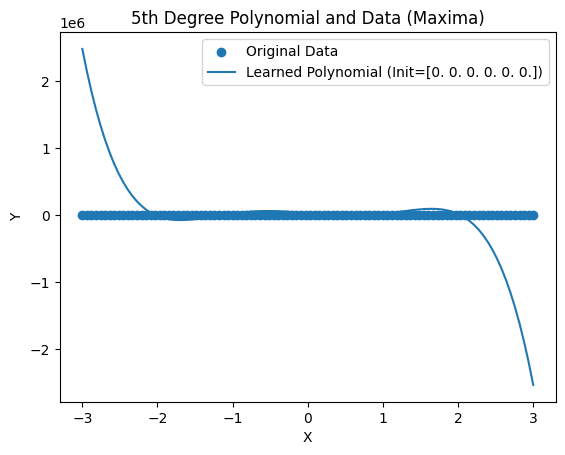

Initialization: [1. 1. 1. 1. 1. 1.], Final Coefficients (Maxima): [  -560.56141464  21085.90479894 132257.90563178  13553.92068235
 -71978.1310871   49737.53954799]


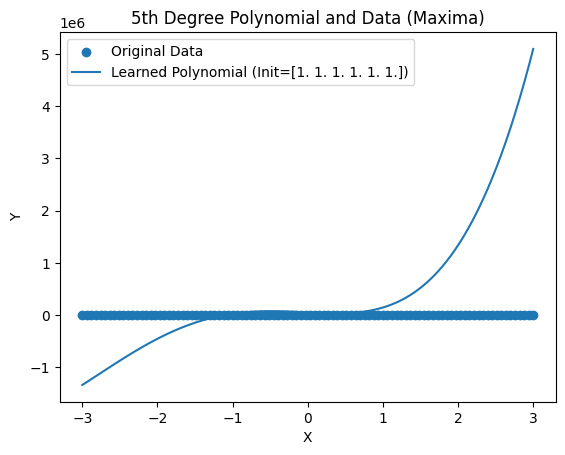

Initialization: [-1  0  1  2 -2  0], Final Coefficients (Maxima): [-4.24788727e+04  1.26749161e+02  1.32257906e+05  3.45130763e+04
 -1.34855598e+05  2.87783839e+04]


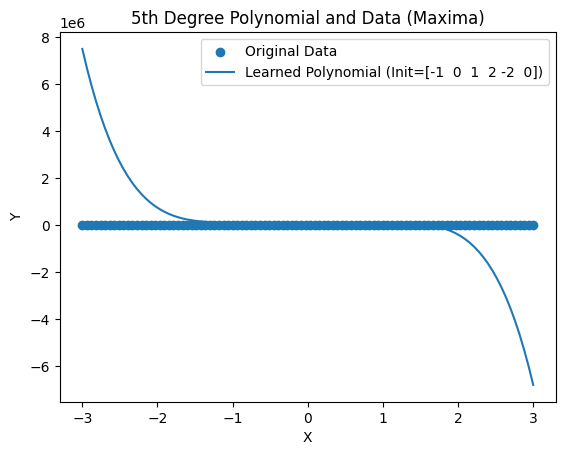

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the 5th degree polynomial
def fifth_degree_polynomial(x, coeffs):
    return np.polyval(coeffs, x)

# Function to calculate the gradient of the cost function
def gradient(x, y, coeffs):
    m = len(x)
    predictions = fifth_degree_polynomial(x, coeffs)
    error = predictions - y
    gradient = np.polyfit(x, error, len(coeffs)-1)
    return gradient

# Gradient Ascent function (modified for finding maximum)
def gradient_ascent(x, y, learning_rate, num_iterations, initial_coeffs):
    coeffs = initial_coeffs

    for _ in range(num_iterations):
        grad = gradient(x, y, coeffs)
        coeffs = coeffs + learning_rate * grad  # Change direction to ascent

    return coeffs

# Generate data for a 5th degree polynomial with known roots
roots = np.array([-2, -1, 0, 1, 2])
coeffs_true = np.poly(roots)
x = np.linspace(-3, 3, 100)
y = fifth_degree_polynomial(x, coeffs_true) + np.random.normal(0, 5, 100)

# Set hyperparameters
num_iterations = 1000
learning_rate = 0.01

# Experiment with different initializations for gradient ascent
initializations = [np.zeros(6), np.ones(6), np.array([-1, 0, 1, 2, -2, 0])]

for init_coeffs in initializations:
    final_coeffs = gradient_ascent(x, y, learning_rate, num_iterations, init_coeffs)
    print(f"Initialization: {init_coeffs}, Final Coefficients (Maxima): {final_coeffs}")

    # Plot the original data and the learned polynomial
    plt.scatter(x, y, label='Original Data')
    plt.plot(x, fifth_degree_polynomial(x, final_coeffs), label=f'Learned Polynomial (Init={init_coeffs})')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('5th Degree Polynomial and Data (Maxima)')
    plt.show()

-->In this modified code, the gradient_ascent function uses coeffs = coeffs + learning_rate * grad to update the coefficients in the direction of the gradient, effectively ascending the function landscape.

-->Note that finding the maximum can be more challenging than finding the minimum, especially when there are multiple local maxima in the function landscape. The convergence to a global maximum depends on the specific characteristics of the function and the chosen hyperparameters.